
# Properties

Compute some network properties for the lollipop graph.


source vertex {target:length, }
0 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7} 
1 {1: 0, 0: 1, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6} 
2 {2: 0, 3: 1, 1: 1, 4: 2, 0: 2, 5: 3, 6: 4, 7: 5} 
3 {3: 0, 2: 1, 4: 1, 1: 2, 5: 2, 0: 3, 6: 3, 7: 4} 
4 {4: 0, 3: 1, 5: 1, 2: 2, 6: 2, 1: 3, 7: 3, 0: 4} 
5 {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 2: 3, 1: 4, 0: 5} 
6 {6: 0, 5: 1, 7: 1, 4: 2, 3: 3, 2: 4, 1: 5, 0: 6} 
7 {7: 0, 6: 1, 5: 2, 4: 3, 3: 4, 2: 5, 1: 6, 0: 7} 

average shortest path length 2.625

length #paths
0 8
1 14
2 12
3 10
4 8
5 6
6 4
7 2
radius: 4
diameter: 7
eccentricity: {0: 7, 1: 6, 2: 5, 3: 4, 4: 4, 5: 5, 6: 6, 7: 7}
center: [3, 4]
periphery: [0, 7]
density: 0.25


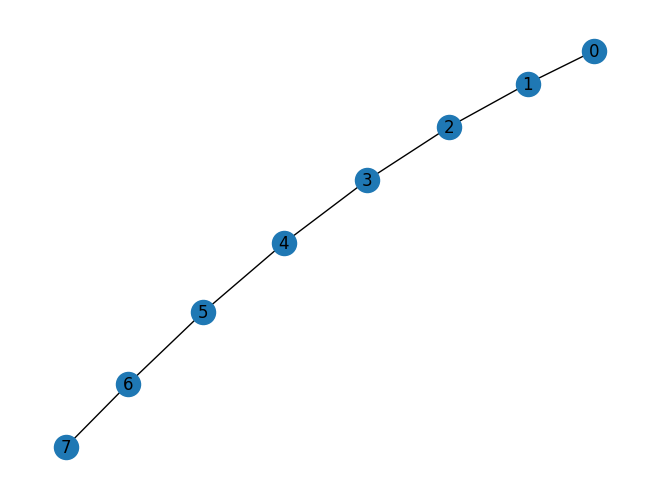

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.lollipop_graph(2, 6)

pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=True)
plt.show()